[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/ANDREWTOLUTAIWO/poor_people_water_consumption/blob/main/PhD%20Thesis%20MLR%20code.ipynb)

### Feature Selection Functions

In [ ]:
# FEATURE SELECTION
import pandas as pd
import numpy as np

# Pearson Correlation
def pearson_correlation(data):
    import matplotlib.pyplot as plt
    import seaborn as sns
    corr = data.corr()
    #Plotting heatmap
    plt.figure(figsize = (10,6))
    return sns.heatmap(corr, annot=True)
    
# Information Gain
def information_gain(x, y):
    from sklearn.feature_selection import mutual_info_classif
    from sklearn.feature_selection import SelectKBest
    # Determine the mutual information
    mutual_info = mutual_info_classif(x, y)
    # Select best five
    five_best = SelectKBest(mutual_info_classif, k=7)
    five_best.fit(x, y)
    index = x.columns[five_best.get_support()]
    score = five_best.scores_
    scores = pd.Series(score)
    scores.index = x.columns
    print("Information Gain", "\n", scores, "\n") 
    
# Recursive Feature Elimination
def recursive_feature_elimination(x, y):
    from sklearn. feature_selection import RFE
    from sklearn.linear_model import SGDRegressor
    model = SGDRegressor(max_iter=1000, tol=1e-3)
    rfe = RFE(model, n_features_to_select=7)
    fit = rfe.fit(x, y)
    # Representing in list form
    feature_ranking = pd.Series(fit.ranking_)
    feature_selected = pd.Series(fit.support_)
    feature_ranking.index = x.columns
    print("Recursive Feature Elimination", "\n", feature_ranking, "\n")
    

### Feature Selection

Information Gain 
 Household income          0.178603
Education                 0.066326
Household size            0.297373
Rainfall                  0.000000
Ave temp                  0.054900
Travel time               1.647222
Amount spent              1.940249
Willingness to pay        1.894012
Kitchen Sink              0.000000
ToiletWC                  0.012108
Garden                    0.008490
Car                       0.000000
Shortest distance         0.115163
Height diff               0.080425
LULC                      0.039974
Gender_female             0.000000
Gender_male               0.013207
Method_borehole           0.026689
Method_carried            0.041050
Method_delivered          0.070457
Method_well               0.039541
Availability_not_often    0.034444
Availability_often        0.040729
Quality_fair              0.000000
Quality_good              0.006108
Quality_poor              0.012229
Quality_very good         0.010378
dtype: float64 

Recursive Feature E

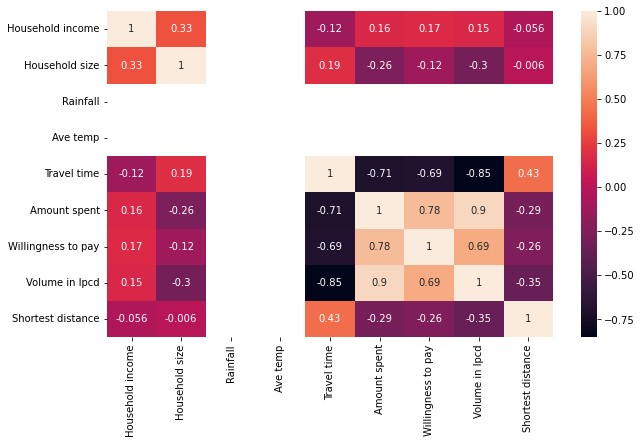

In [4]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Loading the data
data = pd.read_csv("dry_season_data 2.csv")

# One-Hot Encoding
encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)

# Collecting Explanatory Variables. Drop unnecessary variables
data_pearson = data_new.drop(columns=['ID', 
            'Education',
            'Height diff',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Gender_male',
            'Gender_female',
            'Method_delivered',
            'Method_borehole',
            'Method_carried',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_poor',
            'Quality_fair',
            'Quality_good',
            'Quality_very good',
            'LULC'], axis=1)

#Separate target variable from input variables
Xfull = data_new.drop(columns=['ID', 'Volume in lpcd'], axis=1)
yfull= data_new['Volume in lpcd']

# Developing the model with Pipeline that infuses StandardScaler with SDGRegressor
model = Pipeline([('scaler', StandardScaler()), ('sgd', SGDRegressor(max_iter=10000, tol=1e-3))])

# Testing the feature selection code
pearson_correlation(data_pearson)
information_gain(Xfull, yfull)
recursive_feature_elimination(Xfull, yfull)

### PCA Function

In [1]:
# Principal Component Analysis
def pca(n_components, data1, data2):
    # Scale the data
    from sklearn.preprocessing import StandardScaler
    Xscaled = StandardScaler().fit_transform(data1)
    Xscaled = pd.DataFrame(Xscaled, columns=['ID', 
            'Household income',
            'Education',
            'Household size',
            'Rainfall',
            'Ave temp',
            'Travel time',
            'Amount spent',
            'Willingness to pay',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Volume in lpcd',
            'Shortest distance',
            'Height diff',
            'Gender_male',
            'Gender_female',
            'Method_carried',
            'Method_delivered',
            'Method_borehole',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_poor',
            'Quality_fair',
            'Quality_good',
            'Quality_very good',
            'LULC'])
    
    #print(Xscaled)
    #print into excel csv file
    Xscaled.to_csv('data_new_scaled.csv')
    
    # Getting PCA components
    from sklearn.decomposition import PCA
    pcamodel = PCA(n_components)
    pca = pcamodel.fit_transform(Xscaled)
    global X # Making X global so it can be used elsewhere
    X = pd.DataFrame(pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
    print('Explained Variance ', pcamodel.explained_variance_, "\n")
    print('Explained Variance Ratio ', pcamodel.explained_variance_ratio_, "\n")
   
    #print into excel csv file
    X.to_csv('X_data.csv')
    
    #Explained variance plot
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
    plt.ylabel('Explained variance')
    plt.xlabel('Components')
    plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
    plt.legend(loc='upper left')
    plt.show()
       
    #Explained Variance ratio plot
    plt.plot(pcamodel.explained_variance_ratio_)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    
    # Heatmap showing effect of variables on each component
    # Scale the data
    from sklearn.preprocessing import StandardScaler
    Xscaled2 = StandardScaler().fit_transform(data2)
    Xscaled2 = pd.DataFrame(Xscaled2, columns=['Household income',
            'Household size',
            'Rainfall',
            'Ave temp',
            'Travel time',
            'Amount spent',
            'Willingness to pay',
            'Volume in lpcd',
            'Shortest distance',
            'Height diff',
            'LULC'])
    # Getting PCA components
    from sklearn.decomposition import PCA
    pcamodel2 = PCA(n_components)
    pca2 = pcamodel2.fit_transform(Xscaled2)
    
    ax = sns.heatmap(pcamodel2.components_,
                 cmap='Spectral',
                 yticklabels=[ "PC"+str(x) for x in range(1,pcamodel2.n_components_+1)],
                 xticklabels=list(data_new2.columns),
                 cbar_kws={"orientation": "vertical"}, annot=True)
    ax.set_aspect("equal")


### Feature Extraction using PCA

Explained Variance  [3.95813729 2.20353172 2.06824837 1.9710888  1.93084697 1.5195333
 1.37356207] 

Explained Variance Ratio  [0.17194951 0.09572589 0.08984891 0.0856281  0.08387991 0.06601161
 0.05967032] 



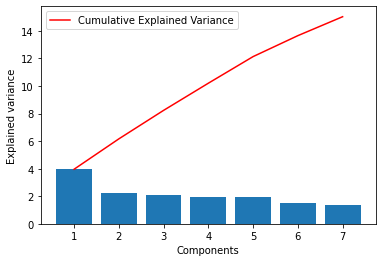

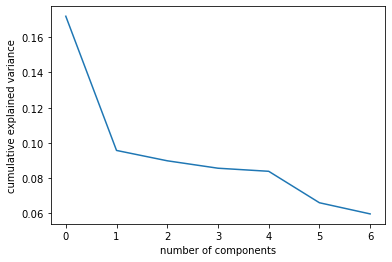

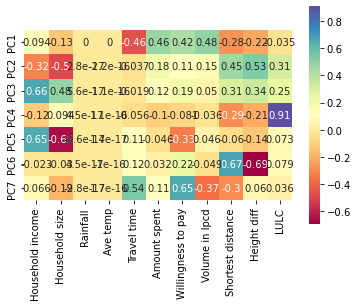

In [2]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Loading the data
data = pd.read_csv("dry_season_data 2.csv")

# One-Hot Encoding
encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)

#Collecting Explanatory Variables. Drop unnecessary variables
data_new2 = data_new.drop(columns=['ID',
            'Education',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Gender_male',
            'Gender_female',
            'Method_carried',
            'Method_delivered',
            'Method_borehole',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_poor',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'], axis=1)

#Testing the PCA code
pca(7, data_new, data_new2)    



## LASSO Regularization

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Loading the data
data = pd.read_csv("dry_season_data 2.csv")

#One-Hot Encoding
encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)

#Declaring variables af all features
features = ['ID', 
            'Household income',
            'Education',
            'Household size',
            'Rainfall',
            'Ave temp',
            'Travel time',
            'Amount spent',
            'Willingness to pay',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Shortest distance',
            'Height diff',
            'Gender_male',
            'Gender_female',
            'Method_carried',
            'Method_delivered',
            'Method_inyard',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_poor',
            'Quality_fair',
            'Quality_good',
            'Quality_very good',
            'LULC']

#Separate target variable from input variables
X = data_new.drop(columns='Volume in lpcd')

y= data_new['Volume in lpcd']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

# Developing the model with Pipeline that infuses StandardScaler with LASSORegressor
pipeline = Pipeline([('scaler', StandardScaler()), ('model', Lasso(alpha=0.001, random_state=10))])

model = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5,verbose=0,
                      )

# We can now fit the model

model.fit(X_train,y_train)

#The best value for α is:

print(model.best_params_, "\n")

#Now, we have to get the values of the coefficients of Lasso regression.

coefficients = model.best_estimator_.named_steps['model'].coef_
print(coefficients, "\n")

#The importance of a feature is the absolute value of its coefficient, so:

importance = np.abs(coefficients)
print(importance, "\n")

#Print coefficients that are greater than zero
print(np.array(features)[importance > 0], "\n")

#Print coefficients that are equalto zero
print(np.array(features)[importance == 0], "\n")


{'model__alpha': 0.1} 

[ 5.07960558e-01  1.14199649e+00  0.00000000e+00 -2.28466784e+00
  0.00000000e+00  0.00000000e+00 -1.81684562e+01  2.64091126e+01
 -6.27211194e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  5.86026516e-01 -9.19946416e-01  4.74671478e-02
 -3.29218583e-01  0.00000000e+00 -1.10215837e-01  2.99512790e-01
 -0.00000000e+00 -0.00000000e+00  8.84021900e-02 -7.40148683e-17
 -0.00000000e+00  3.05207749e-01  1.27674848e-02 -3.42916559e-01] 

[5.07960558e-01 1.14199649e+00 0.00000000e+00 2.28466784e+00
 0.00000000e+00 0.00000000e+00 1.81684562e+01 2.64091126e+01
 6.27211194e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.86026516e-01 9.19946416e-01 4.74671478e-02
 3.29218583e-01 0.00000000e+00 1.10215837e-01 2.99512790e-01
 0.00000000e+00 0.00000000e+00 8.84021900e-02 7.40148683e-17
 0.00000000e+00 3.05207749e-01 1.27674848e-02 3.42916559e-01] 

['ID' 'Household income' 'Household size' 'Travel time' 'Amount spent'
 'Willingness to 